In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

Коды валют и котировки на данный момент

In [5]:
url1 = 'http://www.cbr.ru/scripts/XML_daily.asp?date_req=20/06/2025'
pd.read_xml(url1, encoding='cp1251')

,ID,NumCode,CharCode,Nominal,Name,Value,VunitRate
0,R01010,36,AUD,1,Австралийский доллар,"50,7477","50,7477"
1,R01020A,944,AZN,1,Азербайджанский манат,"46,1670","46,167"
2,R01035,826,GBP,1,Фунт стерлингов,"105,5765","105,5765"
3,R01060,51,AMD,100,Армянских драмов,"20,3955","0,203955"
4,R01090B,933,BYN,1,Белорусский рубль,"26,3696","26,3696"
5,R01100,975,BGN,1,Болгарский лев,"46,1795","46,1795"
6,R01115,986,BRL,1,Бразильский реал,"14,3020","14,302"
7,R01135,348,HUF,100,Форинтов,"22,3512","0,223512"
8,R01150,704,VND,10000,Донгов,"31,3622","0,00313622"
9,R01200,344,HKD,1,Гонконгский доллар,"10,0158","10,0158"


Курс доллара

In [6]:
url = 'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2017&date_req2=01/06/2025&VAL_NM_RQ=R01235'
df = pd.read_xml(url)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # дата в формате дд.мм.гггг
df = df.set_index("Date")
df['usd_rub'] = df['VunitRate'].str.replace(',', '.').astype(float)

df.drop(["Id", "Nominal", "Value", 'VunitRate'], axis=1, inplace = True)
print(df)

            usd_rub
Date               
2017-01-10  59.8961
2017-01-11  59.9533
2017-01-12  60.1614
2017-01-13  59.4978
2017-01-14  59.3700
...             ...
2025-05-27  79.6588
2025-05-28  79.6176
2025-05-29  79.6037
2025-05-30  78.4970
2025-05-31  78.6171

[2071 rows x 1 columns]


<Axes: xlabel='Date'>

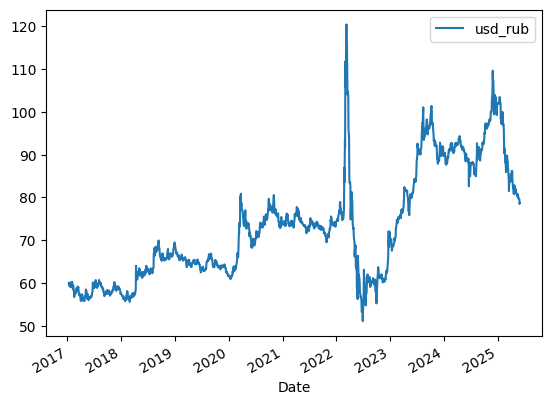

In [7]:
df.plot()

<Axes: xlabel='Date'>

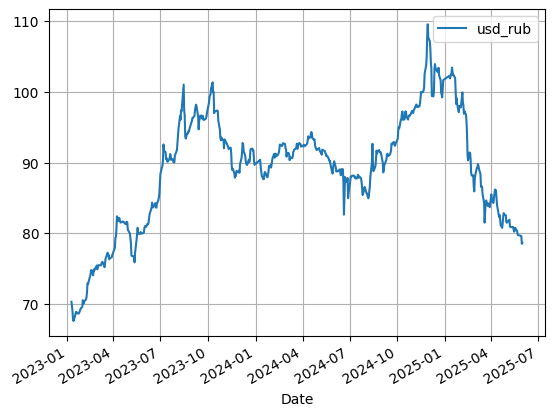

In [8]:
df_cut = df.loc['2023-01-01':'2025-06-01']
df_cut.plot(grid=True)

Очистка данных

In [9]:
def find_anomaly(data_value, window_mean):
    diff = abs(data_value - window_mean) / data_value
    return(diff > 0.1)

In [10]:
w = 7
windows = df_cut.rolling(w).mean()
windows.dropna(inplace = True)
df_clear = pd.DataFrame(columns=['usd_rub'])
for date in windows.index:
    if find_anomaly(df_cut.loc[date, 'usd_rub'], windows.loc[date, 'usd_rub']):
        df_clear.loc[date] = windows.loc[date]
    else:
        df_clear.loc[date] = df_cut.loc[date]
df_clear

,usd_rub
2023-01-18,68.6644
2023-01-19,68.8728
2023-01-20,68.8467
2023-01-21,68.6656
2023-01-24,68.6288
...,...
2025-05-27,79.6588
2025-05-28,79.6176
2025-05-29,79.6037
2025-05-30,78.4970


<Axes: >

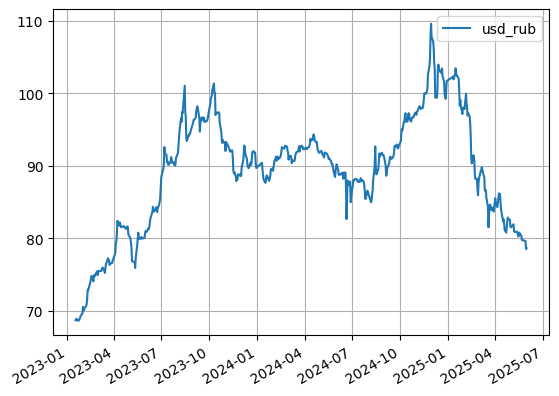

In [11]:
df_clear.plot(grid=True)

Оценка стационарности

In [12]:
result = adfuller(df_clear['usd_rub'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] < 0.05 else "нестационарен"}')

ADF Statistic: -2.4090833891235914
p-value: 0.13918908481383657
Результат: ряд нестационарен


In [13]:
result = kpss(df_clear['usd_rub'], regression='c', nlags='auto')
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] > 0.05 else "нестационарен"}')

KPSS Statistic: 0.913776173607338
p-value: 0.01
Результат: ряд нестационарен


C:\Users\user\AppData\Local\Temp\ipykernel_13028\4067363791.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_clear['usd_rub'], regression='c', nlags='auto')


Оценка автокорреляции

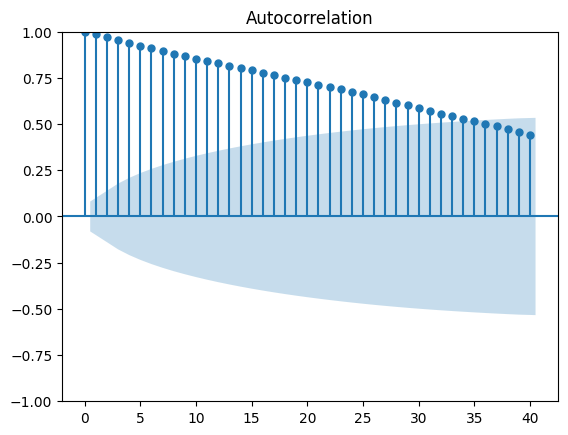

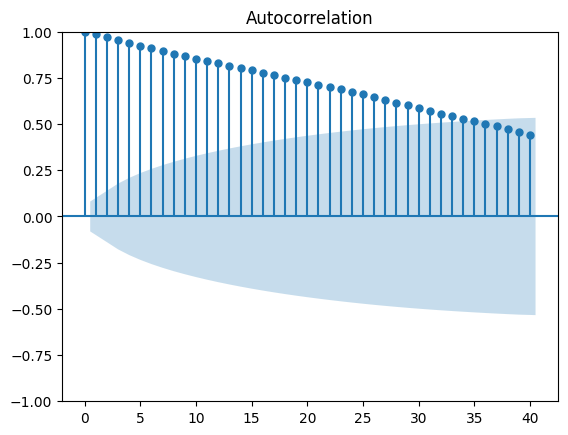

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_clear['usd_rub'], lags=40)

Ряд нестационарен - нужно дифференцировать

<Axes: >

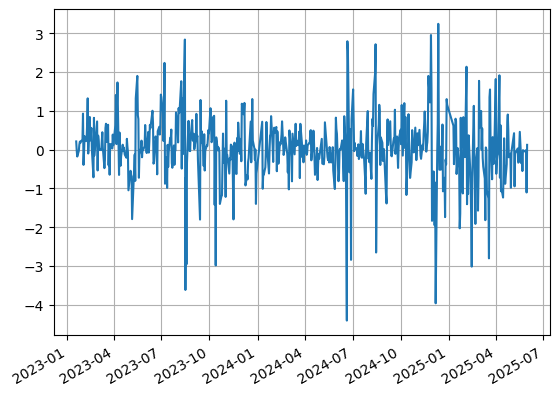

In [15]:
df_diffed = df_clear['usd_rub'].diff().dropna()
df_diffed.plot(grid=True)

In [16]:
df_diffed

2023-01-19    0.2084
2023-01-20   -0.0261
2023-01-21   -0.1811
2023-01-24   -0.0368
2023-01-25    0.1241
               ...  
2025-05-27   -0.0520
2025-05-28   -0.0412
2025-05-29   -0.0139
2025-05-30   -1.1067
2025-05-31    0.1201
Name: usd_rub, Length: 586, dtype: float64

In [17]:
result = adfuller(df_diffed)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] < 0.05 else "нестационарен"}')

ADF Statistic: -19.513546742287634
p-value: 0.0
Результат: ряд стационарен


In [18]:
result = kpss(df_diffed, regression='c', nlags='auto')
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] > 0.05 else "нестационарен"}')

KPSS Statistic: 0.552842236997253
p-value: 0.029765261937555628
Результат: ряд нестационарен


Поиск параметров ARIMA

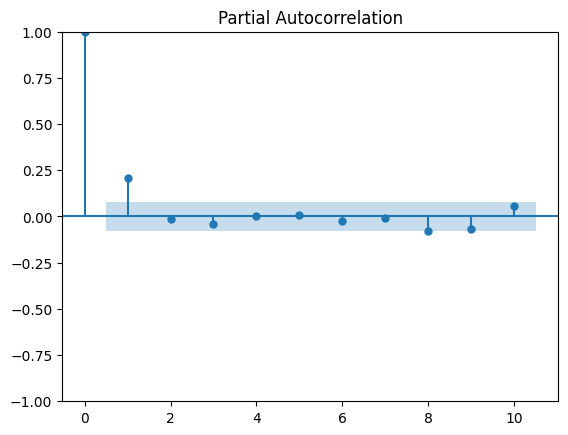

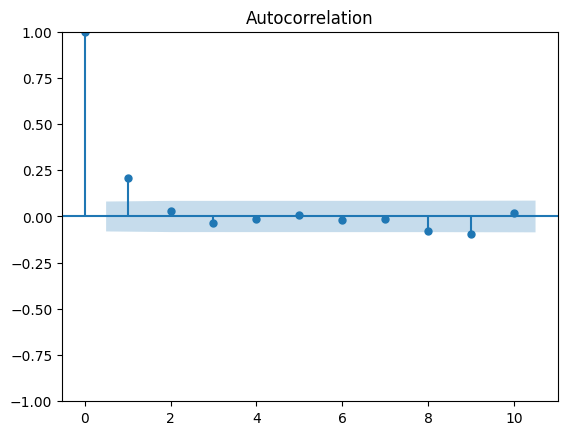

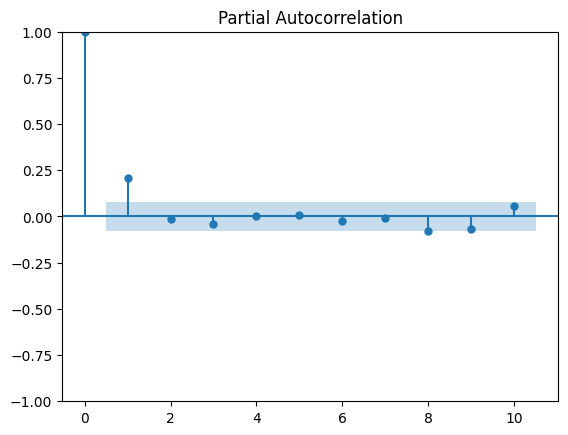

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_diffed, lags = 10)
plot_pacf(df_diffed, lags = 10)

In [20]:
d = 1 # одно дифференцирование
p = 2
q = 2

Построение модели ARIMA

In [21]:
split_date = '2025-05-01'
train = df_diffed.loc[:split_date]
test = df_diffed.loc[split_date:]

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2, 1, 2))
fitted_model = model.fit()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
forecast_diff = fitted_model.forecast(steps = len(test))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [24]:
last_train_value = df_clear.loc[train.index[-1], "usd_rub"]
forecast = forecast_diff.cumsum() + last_train_value

Сравнение предсказаний с тестовой выборкой

In [25]:
test_dates = test.index
forecast.index = test_dates[:len(forecast)]
true_values = df_clear.loc[test_dates[:len(forecast)]]

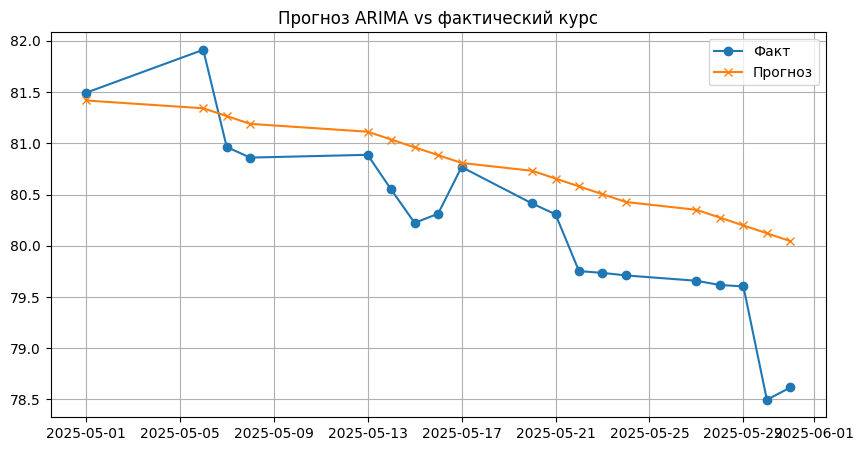

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(true_values.index, true_values.values, label='Факт', marker='o')
plt.plot(forecast.index, forecast.values, label='Прогноз', marker='x')
plt.title('Прогноз ARIMA vs фактический курс')
plt.legend()
plt.grid()
plt.show()

In [27]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

mae = mean_absolute_error(true_values, forecast)
rmse = root_mean_squared_error(true_values, forecast)
print(f"MAE = {mae:.4f}, RMSE = {rmse:.4f}")

MAE = 0.5958, RMSE = 0.7129


Выводы:

В среднем модель ошибается примерно на 74 копейки;
Ошибки распределены достаточно равномерно (RMSE немного больше MAE → нет явно выбивающихся точек).
~0.84% относительной ошибки в среднем — довольно хороший результат.

Модель SARIMA

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train,
    order = (p, d, q),
    seasonal_order = (1, 1, 1, 5),
    enforce_stationarity = False, 
    enforce_invertibility = False,
)
result = model.fit()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA автоподбор параметров

In [52]:
from pmdarima import auto_arima

model = auto_arima(
    train,                   
    seasonal=True,            # разрешаем сезонность
    m=5,                      # длина сезона
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
result = model.fit(train)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprec

In [54]:
forecast_diff = model.predict(n_periods = len(test))
last_train_value = df_clear.loc[train.index[-1], "usd_rub"]
forecast = forecast_diff.cumsum() + last_train_value

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [56]:
test_dates = test.index
forecast.index = test_dates[:len(forecast)]
true_values = df_clear.loc[test_dates[:len(forecast)]]

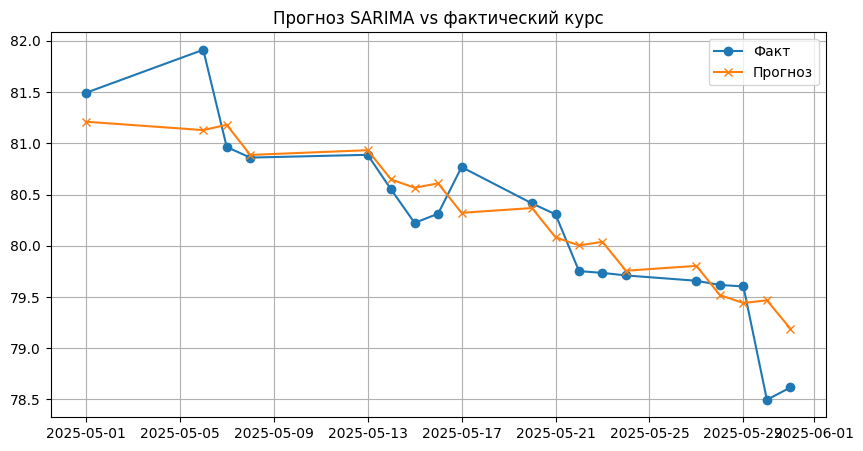

In [57]:
plt.figure(figsize=(10,5))
plt.plot(true_values.index, true_values.values, label='Факт', marker='o')
plt.plot(forecast.index, forecast.values, label='Прогноз', marker='x')
plt.title('Прогноз SARIMA vs фактический курс')
plt.legend()
plt.grid()
plt.show()

In [58]:
mae = mean_absolute_error(true_values, forecast)
rmse = root_mean_squared_error(true_values, forecast)
print(f"MAE = {mae:.4f}, RMSE = {rmse:.4f}")

MAE = 0.2820, RMSE = 0.3768


График прогноза лучше согласуется с фактическим курсом, чем в случае с ARIMA; параметры MAE и RMSE также ниже, чем у ARIMA.

LSTM

Оценка автокорреляции, чтобы оценить размер окна.

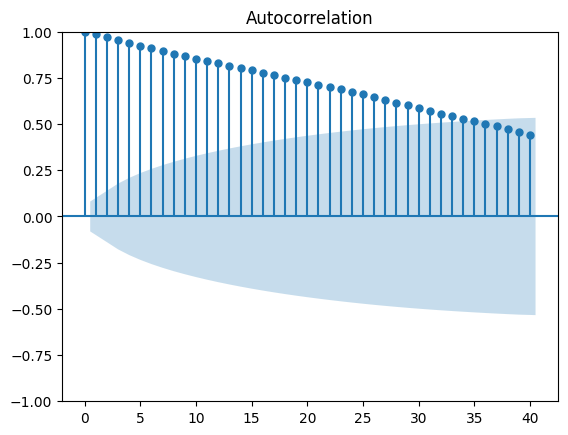

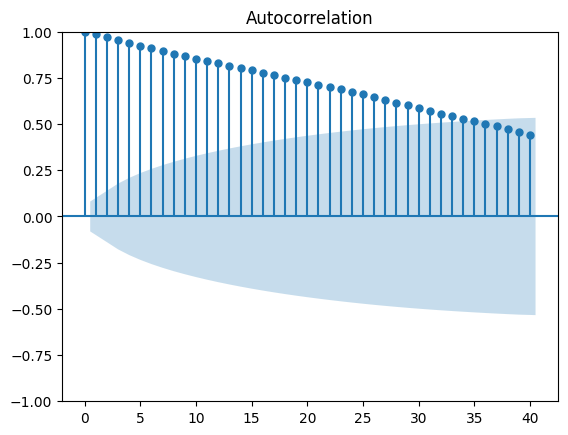

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_clear['usd_rub'], lags=40)

In [38]:
n_steps_in = 33
n_steps_out = 1

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_clear[['usd_rub']].values)  # обязательно 2D массив

In [40]:
x, y = [], []

for i in range(len(scaled_values) - n_steps_in - n_steps_out + 1):
    x.append(scaled_values[i : i  +n_steps_in])
    y.append(scaled_values[i + n_steps_in : i + n_steps_in + n_steps_out])

x = np.array(x)
y = np.array(y)

In [41]:
split_index = int(len(x) * 0.8)

x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]